<a href="https://colab.research.google.com/github/abboswell/stanford-cpn/blob/main/Stanford_CPN_Project_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read Data
This notebook performs basic analyses on the Stanford CPN.

In [ ]:
# Import Library
import networkx as nx
import pandas as pd
import numpy as np

In [ ]:
# Read Data
G = nx.read_graphml(",/graphx.graphml")

In [ ]:
# Collect Node (Course) Data
df = pd.DataFrame.from_dict({node: G.nodes[node] for node in G}, orient="index")
df

,type,label,id,year,subject,code,title,description,repeatable,grading_basis,...,units_max,final_exam,course_id,active,offer_num,academic_group,academic_org,academic_career,max_units_repeat,max_times_repeat
ATHLETIC 1,node,Course,ATHLETIC 1,2022-2023,ATHLETIC,1,Thriving in Athletics: Health and Wellness Con...,"Develops the understanding, self-awareness, co...",False,Satisfactory/No Credit,...,2,False,220267,True,1,DAPER,DAPER,UG,2,1
ATHLETIC 10,node,Course,ATHLETIC 10,2022-2023,ATHLETIC,10,Varsity Sport Experience,Designed for the Varsity Athlete; conditioning...,True,Satisfactory/No Credit,...,2,False,222796,True,1,DAPER,DAPER,UG,30,15
ATHLETIC 11,node,Course,ATHLETIC 11,2022-2023,ATHLETIC,11,Athletic Team Manager,For student managers of intercollegiate teams....,True,Satisfactory/No Credit,...,1,False,102447,True,1,DAPER,DAPER,UG,12,12
ATHLETIC 12,node,Course,ATHLETIC 12,2022-2023,ATHLETIC,12,VARSITY - Baseball,Designed for the Varsity Athlete; conditioning...,True,Satisfactory/No Credit,...,2,False,102306,True,1,MED,MEDDPT,UG,30,15
ATHLETIC 13,node,Course,ATHLETIC 13,2022-2023,ATHLETIC,13,VARSITY - Basketball (Men),Designed for the Varsity Athlete; conditioning...,True,Satisfactory/No Credit,...,2,False,102315,True,1,MED,MEDDPT,UG,30,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PWR 195,node,Course,PWR 195,2022-2023,PWR,195,Writing Center Peer Tutor Seminar (PWR 295),For students selected to serve as peer writing...,False,Satisfactory/No Credit,...,3,False,202052,True,1,VPUE,PWR,UG,3,1
PWR 295,node,Course,PWR 295,2022-2023,PWR,295,Writing Center Peer Tutor Seminar (PWR 195),For students selected to serve as peer writing...,False,Satisfactory/No Credit,...,3,False,202052,True,3,VPUE,PWR,UG,3,1
VPTL 1,node,Course,VPTL 1,2022-2023,VPTL,1,Introduction to Computing at Stanford (CS 1C),For those who want to learn more about Stanfor...,False,Satisfactory/No Credit,...,1,False,105604,True,2,VPTL,VPTL,UG,1,1
VPTL 110,node,Course,VPTL 110,2022-2023,VPTL,110,"Stanford, I Screwed Up!: Becoming a Resilient ...",Everyone fails at something. Learning from fai...,True,Satisfactory/No Credit,...,1,N/A,221021,True,1,VPTL,VPTL,UG,5,5


In [ ]:
# Identify SuperCluster
G_undirected = G.to_undirected()
connected_components = nx.connected_components(G_undirected)
largest_component = max(connected_components, key=len)
print("Largest connected component:", largest_component)

Largest connected component: {'ECON 44', 'CS 221', 'PHYSICS 41E', 'ME 318', 'CS 193A', 'CHEM 176', 'PHYSICS 112', 'EE 102B', 'EE 292X', 'CHEM 123', 'STATS 375', 'PHYSICS 201', 'EE 185', 'CEE 280', 'APPPHYS 273', 'PHYSICS 45', 'BIO 43', 'BIO 147', 'CHEM 90', 'PHYSICS 171', 'CEE 363J', 'CHEM 253', 'CS 11SI', 'CS 227B', 'CS 339N', 'EE 133', 'MATSCI 170', 'CS 294S', 'EARTHSYS 159', 'COMM 180', 'CEE 322', 'MATH 205B', 'PSYCH 10', 'MATH 110', 'BIO 86', 'ECON 178', 'HUMBIO 4B', 'MS&E 243', 'ECON 111', 'ME 30', 'EE 270', 'CHEM 153', 'COMM 276', 'CHEM 251', 'CEE 266G', 'MUSIC 320', 'CSRE 150B', 'MATSCI 358', 'OSPPARIS 40M', 'ECON 41', 'CEE 201E', 'EE 107', 'EARTHSYS 146A', 'CME 204', 'ECON 158', 'CHEMENG 185A', 'CHEM 126', 'CS 422', 'DESIGN 161B', 'STATS 217', 'HUMBIO 122', 'SYMSYS 195U', 'CEE 266F', 'EE 267', 'BIODS 220', 'STATS 305C', 'ME 351B', 'CS 147', 'CS 354', 'BIOMEDIN 210', 'CHEMENG 110B', 'CHEMENG 100', 'CS 351', 'EE 109', 'GEOPHYS 281', 'CEE 275D', 'CME 345', 'BIOE 313', 'POLISCI 150

In [ ]:
# Name SuperCluster
G_sub = G.subgraph(largest_component)
G_sub

# Scale Free

In [ ]:
# Import Library
from plotnine import *

In [ ]:
# Calculate in-degrees and out-degrees
in_degrees = dict(G_sub.in_degree())
out_degrees = dict(G_sub.out_degree())

In [ ]:
# Prepare data for ggplot
degree_data = pd.DataFrame({
    'Node': list(in_degrees.keys()),
    'In-Degree': list(in_degrees.values()),
    'Out-Degree': list(out_degrees.values())
})

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:284: PlotnineWarning: stat_density : Removed 133 rows containing non-finite values.


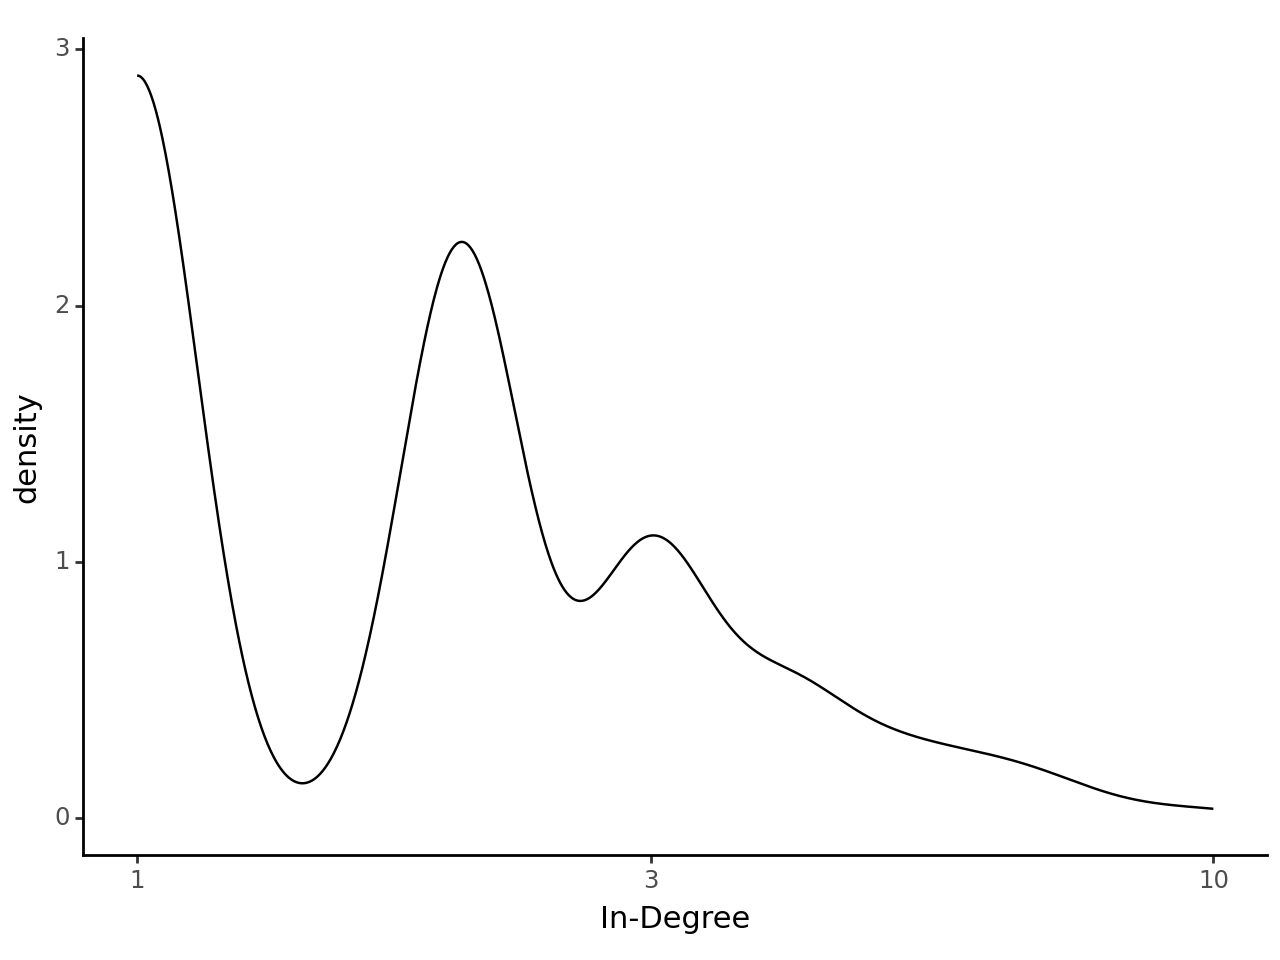

In [ ]:
# Plot in-degree distribution
in_degree_plot = (
    ggplot(degree_data, aes(x='In-Degree')) +
    geom_density() +
    labs(x='In-Degree') +
    theme_classic() +
    scale_x_log10()
)
print(in_degree_plot)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:284: PlotnineWarning: stat_density : Removed 704 rows containing non-finite values.


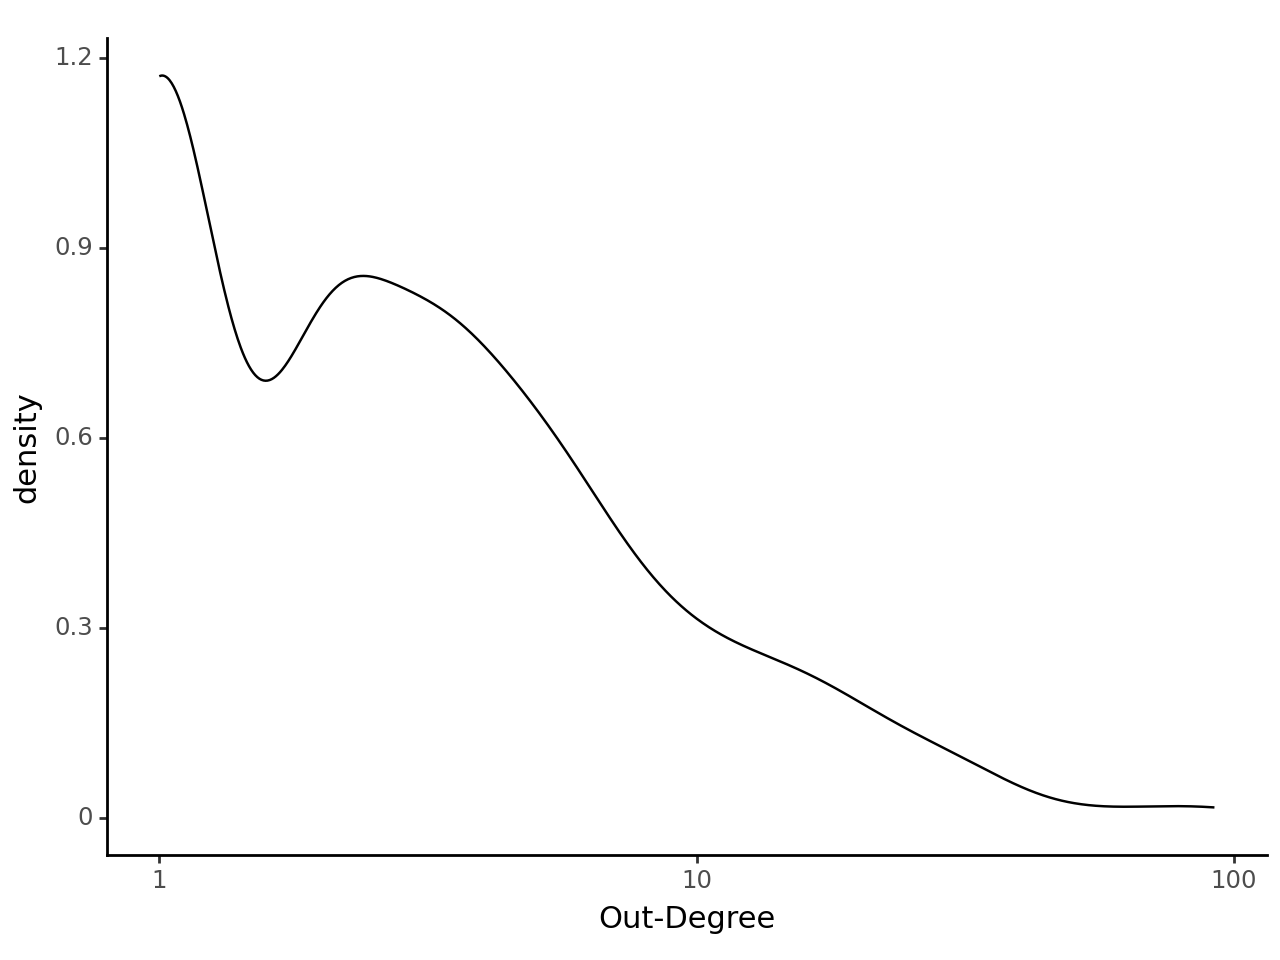

In [ ]:
# Plot out-degree distribution
out_degree_plot = (
    ggplot(degree_data, aes(x='Out-Degree')) +
    geom_density() +
    labs(x='Out-Degree') +
    theme_classic() +
    scale_x_log10()
)
print(out_degree_plot)

In [ ]:
# Save in-degree plot as SVG
in_degree_plot.save(filename='in_degree_distribution.svg', format='svg')

# Save out-degree plot as SVG
out_degree_plot.save(filename='out_degree_distribution.svg', format='svg')

/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: in_degree_distribution.svg
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:284: PlotnineWarning: stat_density : Removed 133 rows containing non-finite values.
/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: out_degree_distribution.svg
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:284: PlotnineWarning: stat_density : Removed 704 rows containing non-finite values.


# Betweeness Centrality

In [ ]:
betweenness = nx.betweenness_centrality(G_sub)
betweenness

{'ECON 44': 0.0,
 'CS 221': 9.298164623156993e-05,
 'PHYSICS 41E': 0.0,
 'ME 318': 7.042088213891693e-06,
 'CS 193A': 3.912271229939829e-07,
 'CHEM 176': 0.0,
 'PHYSICS 112': 0.0,
 'EE 102B': 3.2471851208500585e-05,
 'EE 292X': 0.0,
 'CHEM 123': 9.38945095185559e-06,
 'STATS 375': 0.0,
 'PHYSICS 201': 0.0,
 'EE 185': 0.0,
 'CEE 280': 0.0,
 'APPPHYS 273': 5.0077071743229814e-05,
 'PHYSICS 45': 2.077148862228472e-05,
 'BIO 43': 0.0,
 'BIO 147': 0.0,
 'CHEM 90': 0.0,
 'PHYSICS 171': 0.0001682580460022166,
 'CEE 363J': 0.0,
 'CHEM 253': 0.0,
 'CS 11SI': 0.0,
 'CS 227B': 0.0,
 'CS 339N': 0.0,
 'EE 133': 0.0,
 'MATSCI 170': 0.0,
 'CS 294S': 0.0,
 'EARTHSYS 159': 0.0,
 'COMM 180': 0.0,
 'CEE 322': 0.0,
 'MATH 205B': 0.0,
 'PSYCH 10': 0.0,
 'MATH 110': 0.0,
 'BIO 86': 3.912271229939829e-07,
 'ECON 178': 0.0,
 'HUMBIO 4B': 0.0,
 'MS&E 243': 0.0,
 'ECON 111': 0.0,
 'ME 30': 0.0,
 'EE 270': 0.0,
 'CHEM 153': 2.490812683061691e-05,
 'COMM 276': 0.0,
 'CHEM 251': 0.0,
 'CEE 266G': 7.042088213891693

In [ ]:
scores = pd.DataFrame(betweenness.items(), columns=['Node', 'Betweenness'])
scores

,Node,Betweenness
0,ECON 44,0.000000e+00
1,CS 221,9.298165e-05
2,PHYSICS 41E,0.000000e+00
3,ME 318,7.042088e-06
4,CS 193A,3.912271e-07
...,...,...
1127,EE 364B,0.000000e+00
1128,CS 239,0.000000e+00
1129,MATH 244,0.000000e+00
1130,CEE 271B,1.330172e-05


In [ ]:
top_10_betweenness = scores.sort_values(by=["Betweenness"], ascending=False).head(n=10)
top_10_betweenness

,Node,Betweenness
775,MATH 21,0.000513
393,CS 229,0.000482
369,PHYSICS 130,0.000437
352,CME 100,0.000371
1119,MATH 51,0.000335
939,CS 109,0.000276
499,CS 161,0.000230
511,STATS 116,0.000217
267,ECON 50,0.000215
691,PHYSICS 120,0.000213


# K-Means Clustering

In [ ]:
# Preview datatypes
df.dtypes

type                object
label               object
id                  object
year                object
subject             object
code                object
title               object
description         object
repeatable            bool
grading_basis       object
units_min            int64
units_max            int64
final_exam          object
course_id            int64
active                bool
offer_num           object
academic_group      object
academic_org        object
academic_career     object
max_units_repeat     int64
max_times_repeat     int64
dtype: object

In [ ]:
# Adjust dtypes
df["offer_num"] = df["offer_num"].astype(int)
df["final_exam"].replace("N/A", False, inplace=True)
df['text'] = df["title"] + ' ' + df["description"].fillna('')

In [ ]:
# Identify Key Features
to_Standardize = ["repeatable", "final_exam", "offer_num", "units_min", "units_max", "max_times_repeat", "max_units_repeat"]
to_OneHotEncode = ["year", "subject", "grading_basis", "academic_group", "academic_org", "academic_career"]

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [ ]:
ct = make_column_transformer(
    (StandardScaler(), to_Standardize),
    (OneHotEncoder(), to_OneHotEncode),
    (TfidfVectorizer(), 'text'),
    remainder="drop"
)

In [ ]:
X = ct.fit_transform(df)

In [ ]:
from tqdm import tqdm

In [ ]:
inertia_dict = {}
for k in tqdm(range(1, 51)):
    model = KMeans(n_clusters=k, n_init='auto', random_state=42)
    model.fit(X)
    inertia_dict[k] = model.inertia_

100%|██████████| 50/50 [02:53<00:00,  3.48s/it]


In [ ]:
inertia = pd.DataFrame(inertia_dict.items(), columns=['K', 'Inertia'])
inertia

,K,Inertia
0,1,176597.634603
1,2,159958.864174
2,3,123237.533400
3,4,112124.629889
4,5,105325.745680
5,6,98383.264337
6,7,96907.087788
7,8,98378.529985
8,9,92750.303649
9,10,91485.483689


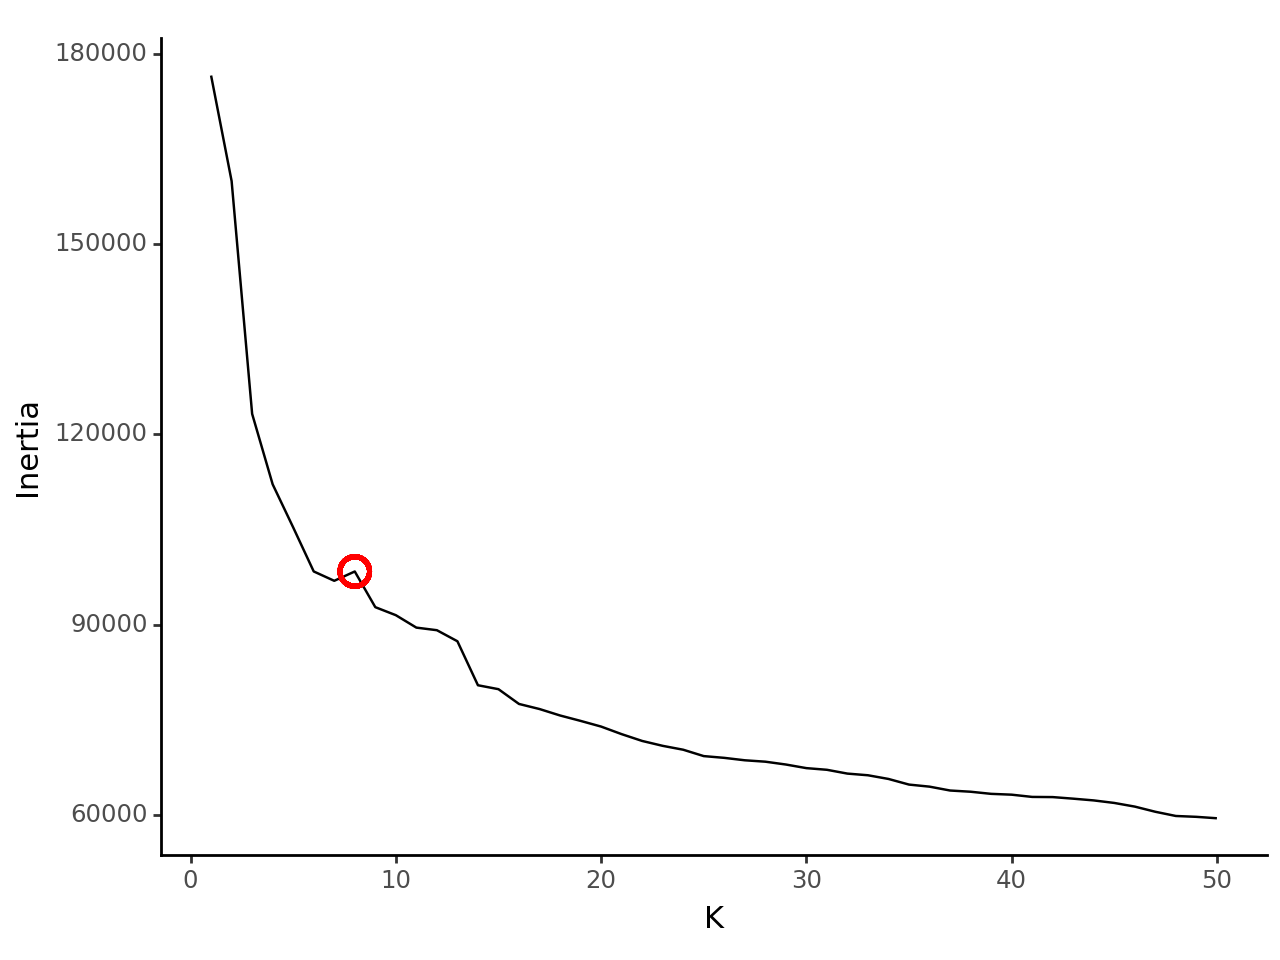

In [ ]:
# Plot elbow
# Inspired by: https://stackoverflow.com/a/71829386
elbow_plot = (
    ggplot(inertia, aes(x = 'K', y = 'Inertia'))
    + geom_line()
    + geom_point(aes(x=8, y=inertia_dict[8]), size=5, fill='#ffffff00', color='red', stroke=1)
    + theme_classic()
)
print(elbow_plot)

In [ ]:
# Save Elbow Plot
elbow_plot.save('elbow.svg', format='svg', width=10, height=6, units='in')

/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 10 x 6 in image.
/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: elbow.svg


In [ ]:
# Fit Model with 8 Clusters
model = KMeans(n_clusters = 8, n_init='auto', random_state=42)
model.fit(X)
model.labels_

array([6, 4, 4, ..., 6, 4, 6], dtype=int32)

In [ ]:
d = dict(zip(G.nodes, model.labels_))
nx.set_node_attributes(G, d, "cluster")
nx.write_graphml(G, "graphxWithClusters.graphml")

In [ ]:
# Import Library
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [ ]:
df_with_cluster = pd.DataFrame.from_dict({node: G.nodes[node] for node in G}, orient="index")
df_with_cluster

,type,label,id,year,subject,code,title,description,repeatable,grading_basis,...,final_exam,course_id,active,offer_num,academic_group,academic_org,academic_career,max_units_repeat,max_times_repeat,cluster
ATHLETIC 1,node,Course,ATHLETIC 1,2022-2023,ATHLETIC,1,Thriving in Athletics: Health and Wellness Con...,"Develops the understanding, self-awareness, co...",False,Satisfactory/No Credit,...,False,220267,True,1,DAPER,DAPER,UG,2,1,6
ATHLETIC 10,node,Course,ATHLETIC 10,2022-2023,ATHLETIC,10,Varsity Sport Experience,Designed for the Varsity Athlete; conditioning...,True,Satisfactory/No Credit,...,False,222796,True,1,DAPER,DAPER,UG,30,15,4
ATHLETIC 11,node,Course,ATHLETIC 11,2022-2023,ATHLETIC,11,Athletic Team Manager,For student managers of intercollegiate teams....,True,Satisfactory/No Credit,...,False,102447,True,1,DAPER,DAPER,UG,12,12,4
ATHLETIC 12,node,Course,ATHLETIC 12,2022-2023,ATHLETIC,12,VARSITY - Baseball,Designed for the Varsity Athlete; conditioning...,True,Satisfactory/No Credit,...,False,102306,True,1,MED,MEDDPT,UG,30,15,4
ATHLETIC 13,node,Course,ATHLETIC 13,2022-2023,ATHLETIC,13,VARSITY - Basketball (Men),Designed for the Varsity Athlete; conditioning...,True,Satisfactory/No Credit,...,False,102315,True,1,MED,MEDDPT,UG,30,15,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PWR 195,node,Course,PWR 195,2022-2023,PWR,195,Writing Center Peer Tutor Seminar (PWR 295),For students selected to serve as peer writing...,False,Satisfactory/No Credit,...,False,202052,True,1,VPUE,PWR,UG,3,1,6
PWR 295,node,Course,PWR 295,2022-2023,PWR,295,Writing Center Peer Tutor Seminar (PWR 195),For students selected to serve as peer writing...,False,Satisfactory/No Credit,...,False,202052,True,3,VPUE,PWR,UG,3,1,3
VPTL 1,node,Course,VPTL 1,2022-2023,VPTL,1,Introduction to Computing at Stanford (CS 1C),For those who want to learn more about Stanfor...,False,Satisfactory/No Credit,...,False,105604,True,2,VPTL,VPTL,UG,1,1,6
VPTL 110,node,Course,VPTL 110,2022-2023,VPTL,110,"Stanford, I Screwed Up!: Becoming a Resilient ...",Everyone fails at something. Learning from fai...,True,Satisfactory/No Credit,...,N/A,221021,True,1,VPTL,VPTL,UG,5,5,4


In [ ]:
# Combine all texts in the same cluster and generate a word cloud for each
cluster_texts = df_with_cluster.groupby('cluster')['title'].apply(lambda texts: ' '.join(texts).lower())
cluster_texts

cluster
0    talking about earthquakes, volcanoes, and floo...
1    the water course (earthsys 104, geophys 104, g...
2    introduction to horsemanship beginning horsema...
3    the oceans: an introduction to the marine envi...
4    varsity sport experience athletic team manager...
5    introduction to geology (geolsci 1) stanford a...
6    thriving in athletics: health and wellness con...
7    chemistry of the earth and planets (geolsci 2)...
Name: title, dtype: object

In [ ]:
# Note down stopwords
stopwords = set(STOPWORDS).union({'student', 'students', 'faculty', 'instructor', 'prerequisite' 'course', 'stanford'})

In [ ]:
def write_wordcloud(number):
  wordcloud = WordCloud(width=800, height=400, background_color="rgba(255, 255, 255, 0)", mode="RGBA", stopwords=stopwords, collocations=False)
  wordcloud.generate(cluster_texts[number])
  wordcloud_svg = wordcloud.to_svg(embed_font=True)
  f = open(f"cluster_{number}.svg","w+")
  f.write(wordcloud_svg )
  f.close()

In [ ]:
for index in range(8):
  write_wordcloud(index)

# Link Prediction

In [ ]:
# Predict missing links via jaccard coefficient
preds = nx.jaccard_coefficient(G_sub.to_undirected())
preds

<generator object _apply_prediction.<locals>.<genexpr> at 0x7c797e865690>

In [ ]:
# Preview missing links
jaccard_list = [(u, v, p) for u, v, p in preds]
jaccard_list_sorted = sorted(jaccard_list, key=lambda x: x[2], reverse=True)
jaccard_list_sorted

[('ECON 44', 'ECON 41', 1.0),
 ('ECON 44', 'HISTORY 103D', 1.0),
 ('ECON 44', 'ECON 131', 1.0),
 ('ECON 44', 'ECON 132', 1.0),
 ('ECON 44', 'ECON 17N', 1.0),
 ('ECON 44', 'ESS 112', 1.0),
 ('ECON 44', 'PUBLPOL 19Q', 1.0),
 ('ECON 44', 'EARTHSYS 212', 1.0),
 ('ECON 44', 'ECON 113', 1.0),
 ('ECON 44', 'INTLPOL 203', 1.0),
 ('PHYSICS 41E', 'CEE 146S', 1.0),
 ('PHYSICS 41E', 'ENGR 60', 1.0),
 ('PHYSICS 41E', 'URBANST 109', 1.0),
 ('EE 292X', 'CEE 292X', 1.0),
 ('STATS 375', 'EE 364B', 1.0),
 ('STATS 375', 'EE 375', 1.0),
 ('PHYSICS 201', 'PHYSICS 199', 1.0),
 ('BIO 147', 'EARTHSYS 247', 1.0),
 ('BIO 147', 'BIO 240', 1.0),
 ('BIO 147', 'EARTHSYS 147', 1.0),
 ('CEE 363J', 'ESS 363F', 1.0),
 ('CEE 363J', 'CEE 262F', 1.0),
 ('CEE 363J', 'CEE 262J', 1.0),
 ('CEE 363J', 'CEE 363F', 1.0),
 ('CS 11SI', 'OSPPARIS 40M', 1.0),
 ('CS 11SI', 'BIOMEDIN 279', 1.0),
 ('CS 11SI', 'CS 371', 1.0),
 ('CS 11SI', 'ME 216M', 1.0),
 ('CS 11SI', 'RAD 260', 1.0),
 ('CS 11SI', 'GENE 217', 1.0),
 ('CS 11SI', 'CS 275'

In [ ]:
# Create a new graph from the original
G_new = G_sub.copy()

In [ ]:
# Add missing links above the threshold
for u, v, p in jaccard_list_sorted:
    if p > 0.5:
        # Adding the edge if it does not already exist
        if not G_new.has_edge(u, v):
            G_new.add_edge(u, v, label='missing_link')

In [ ]:
# Save new graph
nx.write_graphml(G, "graphxWithMissingLinks.graphml")